In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# Cargar el archivo JSON directamente en un DataFrame
df = pd.read_json('../json/isc_verbs_data.json')

# Crear un DataFrame a partir de las formas conjugadas de los verbos
inflected_forms = [form for verb_data in df['inflected_forms'] for form in verb_data]
df_inflected = pd.DataFrame(inflected_forms)

In [3]:
# Función para asegurarse de que cada campo sea una lista válida
def ensure_list(value):
    return value if isinstance(value, list) else []

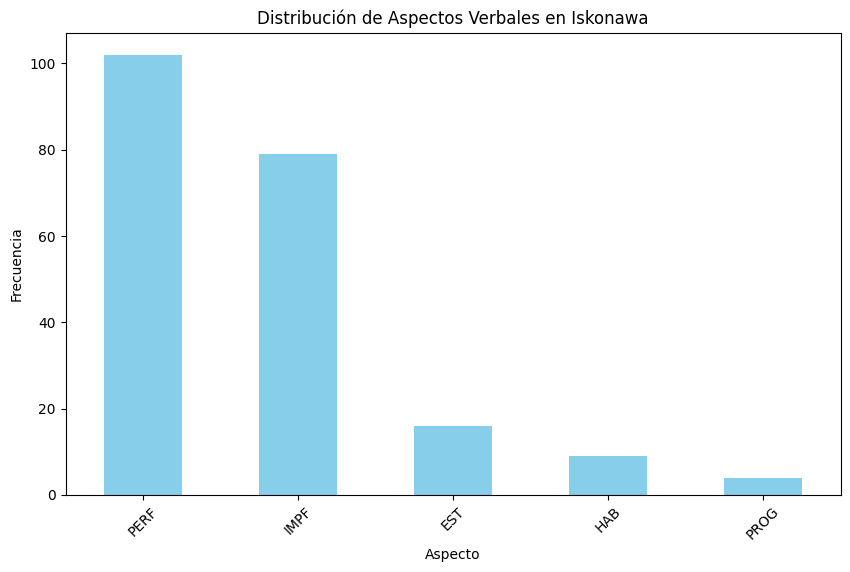

In [4]:
# 1. Distribución de Aspecto (Aspect)
df_inflected['aspect'] = df_inflected['morph_features'].apply(lambda x: ensure_list(x.get('aspect', [])))
aspect_counts = df_inflected['aspect'].explode().value_counts()

# Graficar la distribución de aspectos
plt.figure(figsize=(10, 6))
aspect_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Aspectos Verbales en Iskonawa')
plt.xlabel('Aspecto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

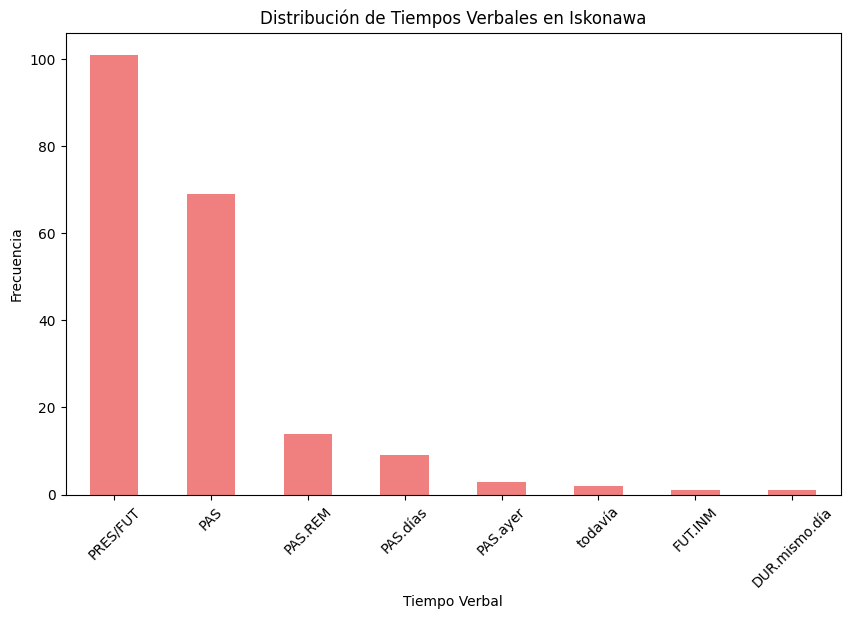

In [5]:
# 2. Distribución de Tiempo Verbal (Tense)
df_inflected['tense'] = df_inflected['morph_features'].apply(lambda x: ensure_list(x.get('tense', [])))
tense_counts = df_inflected['tense'].explode().value_counts()
# Juntar Presente y Futuro en un solo grupo
tense_counts['PRES/FUT'] = tense_counts.get('Pres', 0) + tense_counts.get('Fut', 0)
tense_counts.drop(['Pres', 'Fut'], inplace=True)
# Ordenar por frecuencia
tense_counts = tense_counts.sort_values(ascending=False)

# Graficar la distribución de tiempos verbales
plt.figure(figsize=(10, 6))
tense_counts.plot(kind='bar', color='lightcoral')


plt.title('Distribución de Tiempos Verbales en Iskonawa')
plt.xlabel('Tiempo Verbal')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

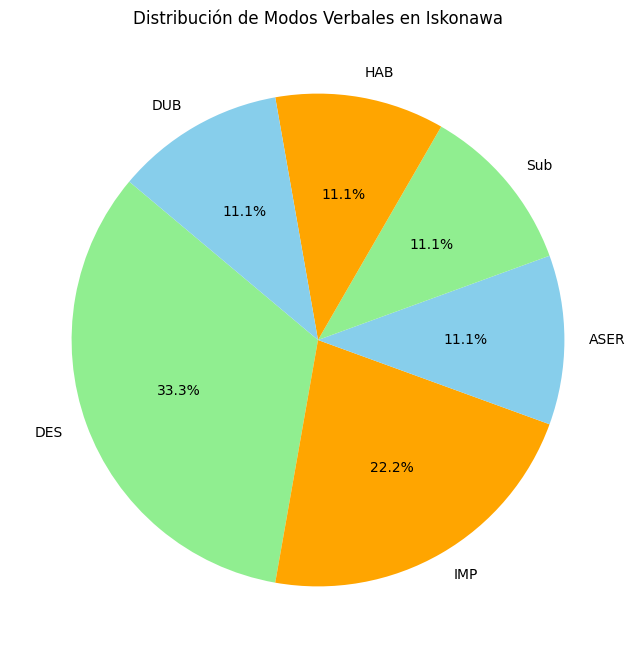

In [6]:
# 3. Distribución de Modo Verbal (Mood)
df_inflected['mood'] = df_inflected['morph_features'].apply(lambda x: ensure_list(x.get('mood', [])))
mood_counts = df_inflected['mood'].explode().value_counts()
# Eliminar Ind de la lista de modos verbales
mood_counts.drop('IND', inplace=True)

# Graficar la distribución de modos verbales
plt.figure(figsize=(8, 8))
mood_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'orange', 'skyblue'])
plt.title('Distribución de Modos Verbales en Iskonawa')
plt.ylabel('')
plt.show()

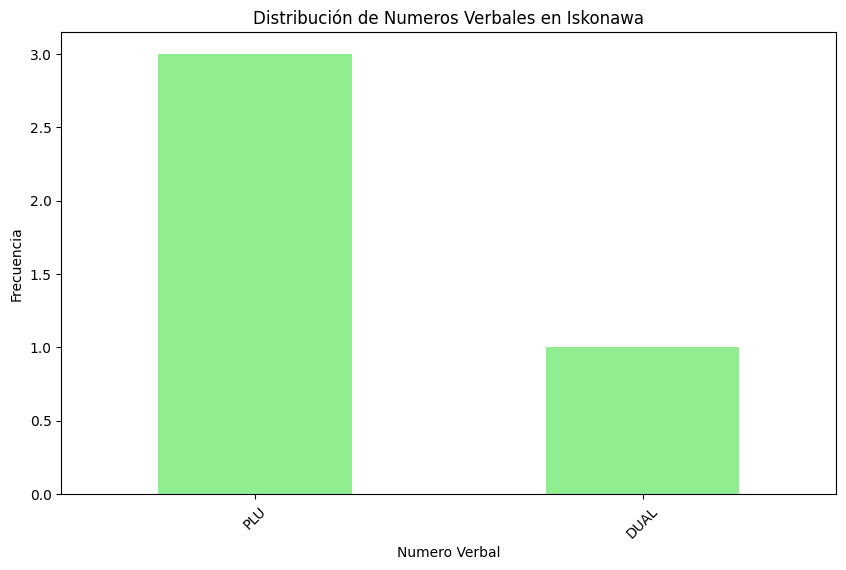

In [7]:
df_inflected['number'] = df_inflected['morph_features'].apply(lambda x: ensure_list(x.get('number', [])))
number_counts = df_inflected['number'].explode().value_counts()
# Graficar la distribución de number verbales
plt.figure(figsize=(10, 6))
number_counts.plot(kind='bar', color='lightgreen')


plt.title('Distribución de Numeros Verbales en Iskonawa')
plt.xlabel('Numero Verbal')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

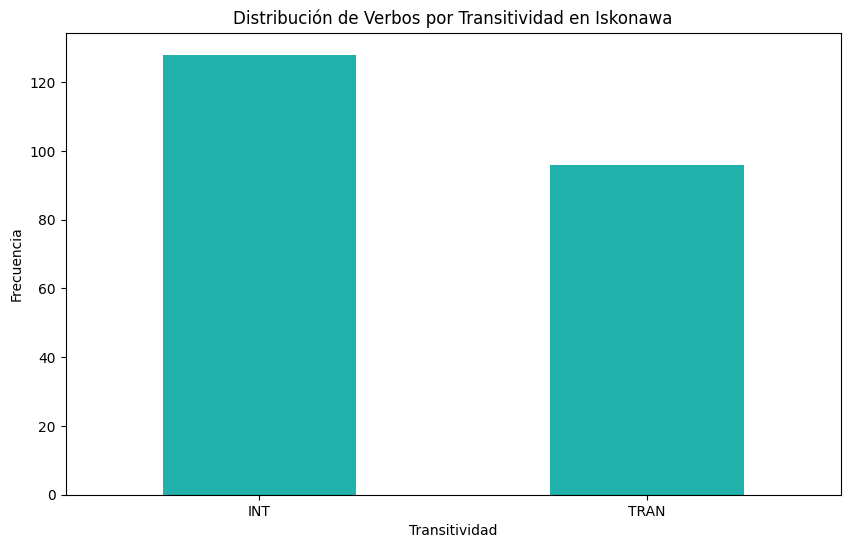

In [8]:
# 5. Frecuencia de Verbos por Transitividad
df_inflected['transitivity'] = df_inflected['morph_features'].apply(lambda x: ensure_list(x.get('transitivity', [])))
transitivity_counts = df_inflected['transitivity'].explode().value_counts()

# Graficar la distribución de transitividad de los verbos
plt.figure(figsize=(10, 6))
transitivity_counts.plot(kind='bar', color='lightseagreen')
plt.title('Distribución de Verbos por Transitividad en Iskonawa')
plt.xlabel('Transitividad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [11]:
# Extraer y combinar todas las características en `isc_features`
df_inflected['transitivity'] = df_inflected['morph_features'].apply(lambda x: ensure_list(x.get('transitivity', [])))
df_inflected['aspect'] = df_inflected['morph_features'].apply(lambda x: ensure_list(x.get('aspect', [])))
df_inflected['tense'] = df_inflected['morph_features'].apply(lambda x: ensure_list(x.get('tense', [])))
df_inflected['mood'] = df_inflected['morph_features'].apply(lambda x: ensure_list(x.get('mood', [])))
df_inflected['negation'] = df_inflected['isc_features'].apply(lambda x: ensure_list(x.get('negation', [])))
# df_inflected['movement'] = df_inflected['isc_features'].apply(lambda x: ensure_list(x.get('movement', [])))


# Crear un DataFrame separado para cada característica y contar la frecuencia
transitivity_counts = df_inflected['transitivity'].explode().value_counts()
aspect_counts = df_inflected['aspect'].explode().value_counts()
tense_counts = df_inflected['tense'].explode().value_counts()
mood_counts = df_inflected['mood'].explode().value_counts()
# voice_counts = df_inflected['voice'].explode().value_counts()
negation_counts = df_inflected['negation'].explode().value_counts()
# movement_counts = df_inflected['movement'].explode().value_counts()


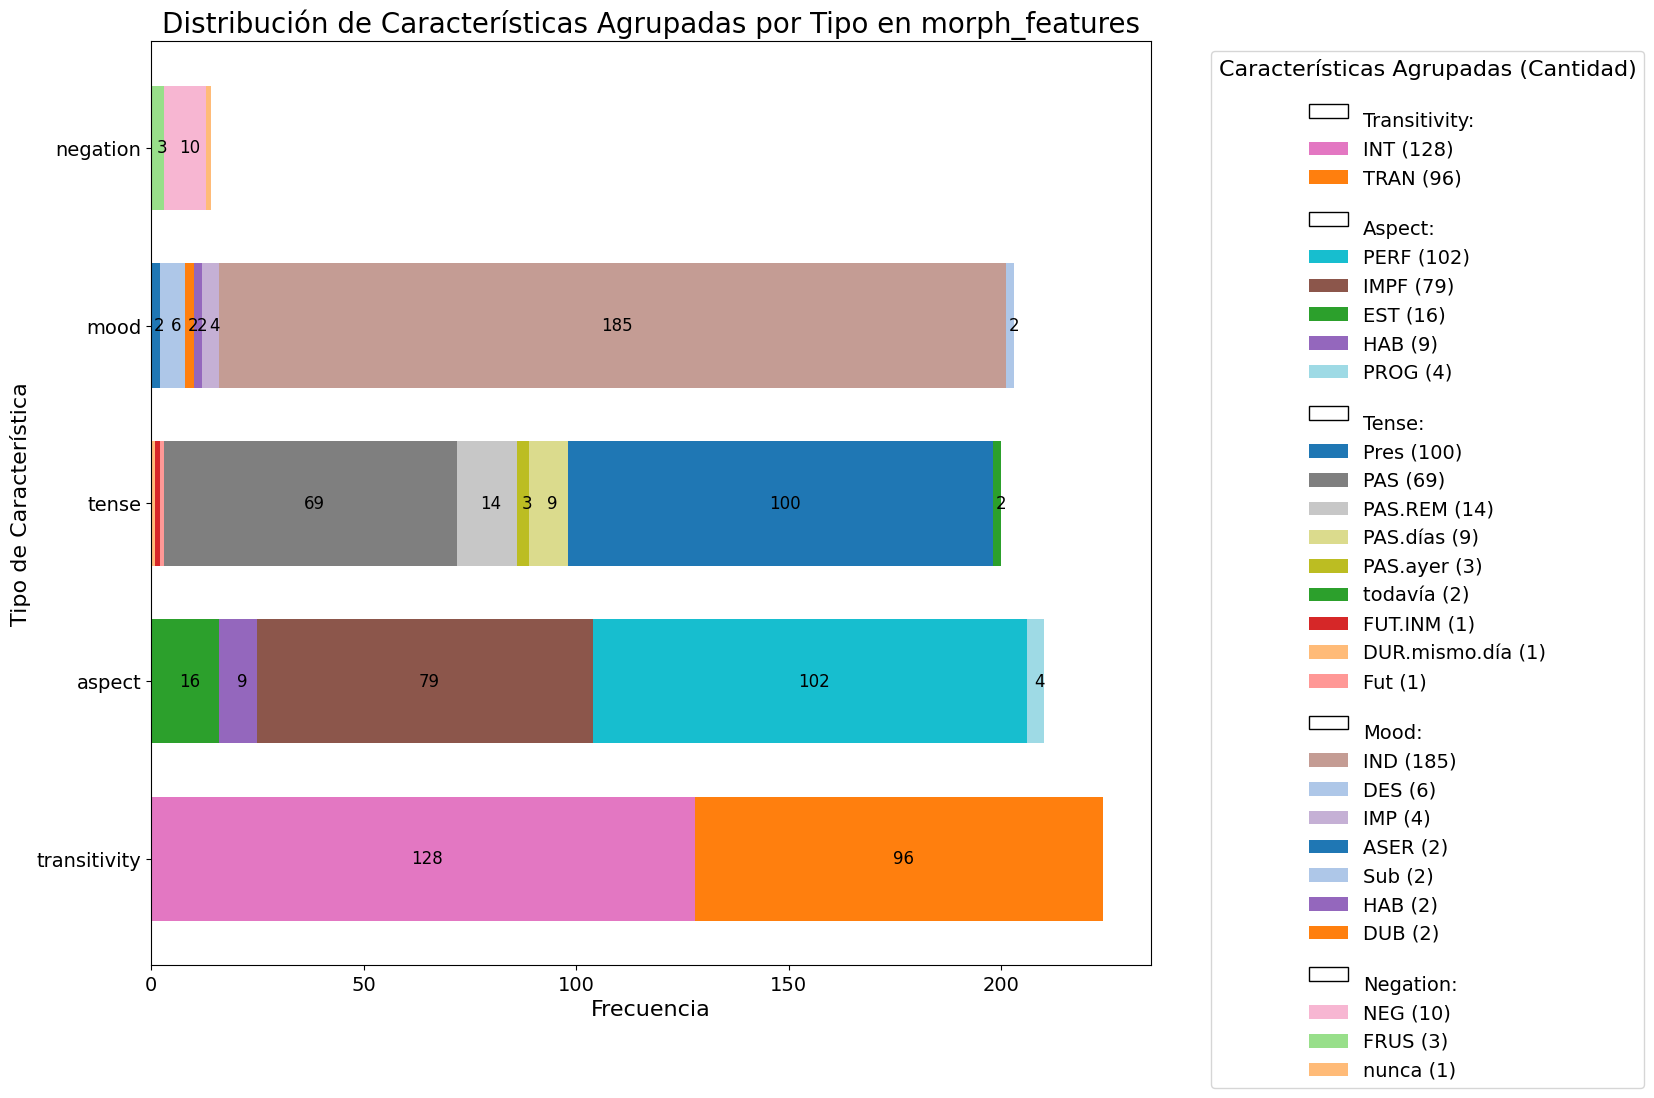

In [27]:
# Crear el DataFrame
feature_df = pd.DataFrame({
    'transitivity': transitivity_counts,
    'aspect': aspect_counts,
    'tense': tense_counts,
    'mood': mood_counts,
    'negation': negation_counts,
}).fillna(0)

# Transponer el DataFrame para facilitar la visualización apilada
feature_df = feature_df.transpose()

# Crear una lista de colores para cada característica en el gráfico de barras, respetando el orden de las columnas
colormap = plt.get_cmap('tab20')
colors = {feature: colormap(i % 20) for i, feature in enumerate(feature_df.columns)}

# Graficar el gráfico de barras apiladas con orientación horizontal y ajustar el tamaño de la figura
ax = feature_df.plot(kind='barh', stacked=True, figsize=(16, 12), width=0.7, color=[colors[feature] for feature in feature_df.columns])
plt.title('Distribución de Características Agrupadas por Tipo en morph_features', fontsize=20)
plt.xlabel('Frecuencia', fontsize=16)
plt.ylabel('Tipo de Característica', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Crear una lista de parches para la leyenda usando los colores asignados en el gráfico y agregando la cantidad
legend_elements = []
grouped_features = {
    'Transitivity': transitivity_counts,
    'Aspect': aspect_counts,
    'Tense': tense_counts,
    'Mood': mood_counts,
    'Negation': negation_counts,
}

# Asignar colores a cada característica y agregar la cantidad en la leyenda
for group, features in grouped_features.items():
    legend_elements.append(Patch(facecolor="white", label=f"\n{group}:", fill=False, in_layout=False))  # Agregar un espacio en blanco para separar los grupos
    for feature in features.index:
        count = features[feature]  # Obtener la cantidad de la característica
        legend_label = f"{feature} ({count})"  # Crear la etiqueta con nombre y cantidad
        legend_elements.append(Patch(facecolor=colors[feature], label=legend_label))

# Crear la leyenda única agrupada con cantidades y aumentar el tamaño de la fuente
plt.legend(handles=legend_elements, title='Características Agrupadas (Cantidad)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)

# Añadir etiquetas con los valores exactos a cada barra, solo si el valor es mayor que un umbral mínimo
for container in ax.containers:
    ax.bar_label(
        container, 
        labels=[f'{int(v)}' if v > 1 else '' for v in container.datavalues],  # Mostrar solo valores mayores que 1
        label_type='center', 
        fontsize=12,  # Tamaño de la fuente de las etiquetas
        color='black',  # Color del texto para que sea visible
        rotation=0,  # No rotar las etiquetas
        padding=3  # Espacio adicional alrededor de las etiquetas
    )

# Ajustar los márgenes para evitar el recorte de la leyenda
plt.subplots_adjust(right=0.75)

# Mostrar el gráfico
plt.show()

In [17]:
grouped_features_df = pd.DataFrame(grouped_features)
grouped_features_df

,Transitivity,Aspect,Tense,Mood,Negation
ASER,NaN,NaN,NaN,2.0,NaN
DES,NaN,NaN,NaN,6.0,NaN
DUB,NaN,NaN,NaN,2.0,NaN
DUR.mismo.día,NaN,NaN,1.0,NaN,NaN
EST,NaN,16.0,NaN,NaN,NaN
FRUS,NaN,NaN,NaN,NaN,3.0
FUT.INM,NaN,NaN,1.0,NaN,NaN
Fut,NaN,NaN,1.0,NaN,NaN
HAB,NaN,9.0,NaN,2.0,NaN
IMP,NaN,NaN,NaN,4.0,NaN
